In [25]:
import cv2
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt

# open camera and read video
save webcam frames in video

In [15]:
print(cv2.__version__)
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(r"first.avi",fourcc,20.0,(640,480))
while True:
    ret, frame =cap.read()
    if ret:
        cv2.imshow("WebCam",frame)
        out.write(frame)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
cap.release()
out.release()
cv2.destroyAllWindows()

4.8.1


# Drawing shapes

In [4]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(r"assets\first.avi",fourcc,20.0,(640,480))
width = cap.get(3) # we can get it by index
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
while True:
    ret,frame = cap.read()
    if ret:
        frame = cv2.rectangle(frame,(10,10),(100,100),(0,255,100), 10)
        time = str(dt.datetime.now())
        frame = cv2.putText(frame, time,(100,350),font,2,(0,255,0),1,cv2.LINE_8)
        cv2.imshow('my face',frame)
        out.write(frame)
        if cv2.waitKey(1)&0xff == ord('q'):
            break
        elif cv2.waitKey(1)&0xff == ord('s'):
            cv2.imwrite(r"assets\loay.jpg",frame)
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()


# mouse events

In [8]:
#this code set circle when you click on a position
image = np.zeros((750,750,3),dtype= np.int8)
def click_event(event,x,y,flags,param):
    global image
    if event == cv2.EVENT_LBUTTONDOWN:
        image = cv2.circle(image,(x,y),10,(200,210,0),-1)
        cv2.imshow('image',image)

cv2.imshow("image",image)
cv2.setMouseCallback('image',click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# this code read the position of image
lenna = cv2.imread("assets\Lenna.png")
lenna = cv2.copyMakeBorder(lenna,60,50,0,0,cv2.BORDER_CONSTANT,value=(255,255,255))
# i set padding on the top and the bottom so that i can find space for title and position 
def mouse_event(event , x , y , flag , param):
    global lenna
    if event == cv2.EVENT_MOUSEMOVE:
        lenna_copy = lenna.copy()
        text = f"({y} , {x})"
        lenna_copy = cv2.putText(lenna_copy , "position" , (50,50) , cv2.FONT_ITALIC, 2 , (30,30,30) ,3 ,cv2.LINE_8 )
        lenna_copy = cv2.putText(lenna_copy , text , (50,430) , cv2.FONT_HERSHEY_COMPLEX_SMALL , 2 , (30,30,30) ,1 ,cv2.LINE_8 )
        cv2.imshow("lena",lenna_copy)
cv2.imshow("lena" , lenna)
cv2.setMouseCallback("lena" , mouse_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

# image properities

In [2]:
lena = cv2.imread("assets\Lenna.png")
print(lena.shape)
print(lena.dtype)
print(lena.size)
b , g , r = cv2.split(lena)
print(b.shape)
lena = cv2.merge((b,g,r))

cv2.imshow("lenna",lena)
cv2.waitKey(0)
cv2.destroyAllWindows()

(330, 330, 3)
uint8
326700
(330, 330)


add two images 

In [22]:
messi = cv2.imread("assets\Messi.png")
CR7 = cv2.imread("assets\CR7.png")
messi= cv2.resize(messi,(1500,800))
CR7= cv2.resize(CR7,(1500,800))
Art = cv2.addWeighted(messi,0.5,CR7,0.5,0)

cv2.imshow("art",Art)
cv2.waitKey(0)
cv2.destroyAllWindows()

bitwise operations

In [33]:
img1 =cv2.imread(r"assets\1bit1.png")
img2 =cv2.imread(r"assets\2bit2.png")
img = np.vstack((img1,img2))
current_image = 0
and_img = cv2.bitwise_and(img1,img2)
or_img = cv2.bitwise_or(img1,img2)
xor_img = cv2.bitwise_xor(img1,img2)
not_img1= cv2.bitwise_not(img1)
not_img2 = cv2.bitwise_not(img2)

# stack all images in array
images = [and_img, or_img ,xor_img, not_img1, not_img2]
texts = ["AND","OR","XOR","not1","not2"]
images[current_image] = cv2.putText(images[current_image],texts[current_image], (10,30),
                                            cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),2)
cv2.imshow("image",images[current_image])
cv2.imshow("image1 and image2",img)

# use D in the keyboard to move between the three images and Q to quit
while True:
    key = cv2.waitKey(1) & 0xff
    if key == ord('d'):
        current_image = (current_image+1)%5
        images[current_image] = cv2.putText(images[current_image],texts[current_image], (10,30),
                                            cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),2)
        cv2.imshow("image",images[current_image])
    elif key == ord('q'):
        break
cv2.destroyAllWindows()

# Trackbar

In [2]:
def nothing(x):
    pass

cv2.namedWindow("choose color")
image = np.zeros((300,300,3),np.uint8)

cv2.createTrackbar("blue","choose color",0,255,nothing)
cv2.createTrackbar("green","choose color",0,255,nothing)
cv2.createTrackbar("red","choose color",0,255,nothing)

while True:
    key = cv2.waitKey(1)& 0xff
    cv2.imshow("choose color",image)
    red = cv2.getTrackbarPos("red","choose color")
    green = cv2.getTrackbarPos("green","choose color")
    blue = cv2.getTrackbarPos("blue","choose color")
    image[:] = [blue,green,red]

    if key == ord('q'):
        break

cv2.destroyAllWindows()



# Object Detetction using HSV colors

In [11]:
def nothing(x):
    pass

#balls = cv2.imread(r"assets\balls.png")
cv2.namedWindow("balls")
cv2.namedWindow("Track",cv2.WINDOW_NORMAL)
cv2.namedWindow("result")
cap = cv2.VideoCapture(0)

# Create trackbars
cv2.createTrackbar("Hue_U","Track",179,179,nothing)
cv2.createTrackbar("sat_U", "Track",255,255,nothing)
cv2.createTrackbar("val_U" ,"Track",255,255,nothing)
cv2.createTrackbar("Hue_L","Track",0,179,nothing)
cv2.createTrackbar("sat_L", "Track",0,255,nothing)
cv2.createTrackbar("val_L" ,"Track",0,255,nothing)

while True:
    key = cv2.waitKey(1)& 0xff
    #frame_hsv = cv2.cvtColor(balls,cv2.COLOR_BGR2HSV)
    ret, frame = cap.read()
    frame_hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    # Get current positions of the trackbars
    hue_up = cv2.getTrackbarPos("Hue_U", "Track")
    hue_D = cv2.getTrackbarPos("Hue_L", "Track")
    sat_up = cv2.getTrackbarPos("sat_U","Track")
    val_up = cv2.getTrackbarPos("val_U", "Track")
    sat_D = cv2.getTrackbarPos("sat_L","Track")
    val_D = cv2.getTrackbarPos("val_L", "Track")

    # Define upper and lower bounds for the HSV mask
    u_b = np.array([hue_up,sat_up,val_up])
    d_b = np.array([hue_D,sat_D,val_D])

    # Apply the mask to the original image
    mask = cv2.inRange(frame_hsv,d_b,u_b)
    result = cv2.bitwise_and(frame,frame,mask=mask)

    # Display the images
    cv2.imshow("balls",frame)
    cv2.imshow("result",result)
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


# thresholding

threshold function

In [17]:
# this code to binarize image like camScanner 
def nothing(x):
    pass
# read image and convert it to gray scale
h_image = cv2.imread(r"assets\hand_Written.jpg")
gray_img = cv2.cvtColor(h_image,cv2.COLOR_BGR2GRAY)
gray_img = cv2.resize(gray_img,(500,600))

#create trackbar to control threshold value
cv2.namedWindow("hand written image")
cv2.createTrackbar("threshold","hand written image",0,255,nothing)

while True:
    key =cv2.waitKey(1) & 0xff
    threshold =cv2.getTrackbarPos("threshold","hand written image")
    
    # apply threshold to grayscale image
    _ , th_image = cv2.threshold(gray_img,threshold,255,cv2.THRESH_BINARY)
    cv2.imshow("hand written image",th_image)
    if key == ord('q'):
        break
cv2.destroyAllWindows()

adaptive threshold method

In [24]:
def nothing(x):
    pass
# read image and convert it to gray scale
h_image = cv2.imread(r"assets\hand_Written.jpg",0)
h_image= cv2.resize(h_image,(500,600))
sizes = [3,5,7,9,11,13,15,17,19,21,23,25,27,29]
#create trackbar to control threshold value
cv2.namedWindow("hand written image")
cv2.createTrackbar("window size","hand written image",0,len(sizes)-1,nothing)

while True:
    key =cv2.waitKey(1) & 0xff
    w_size =sizes[cv2.getTrackbarPos("window size","hand written image")]
    
    # apply threshold to grayscale image
    th_image = cv2.adaptiveThreshold(h_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,w_size , 2)
    cv2.imshow("hand written image",th_image)
    if key == ord('q'):
        break
cv2.destroyAllWindows()

# matplotlib library

<function matplotlib.pyplot.show(close=None, block=None)>

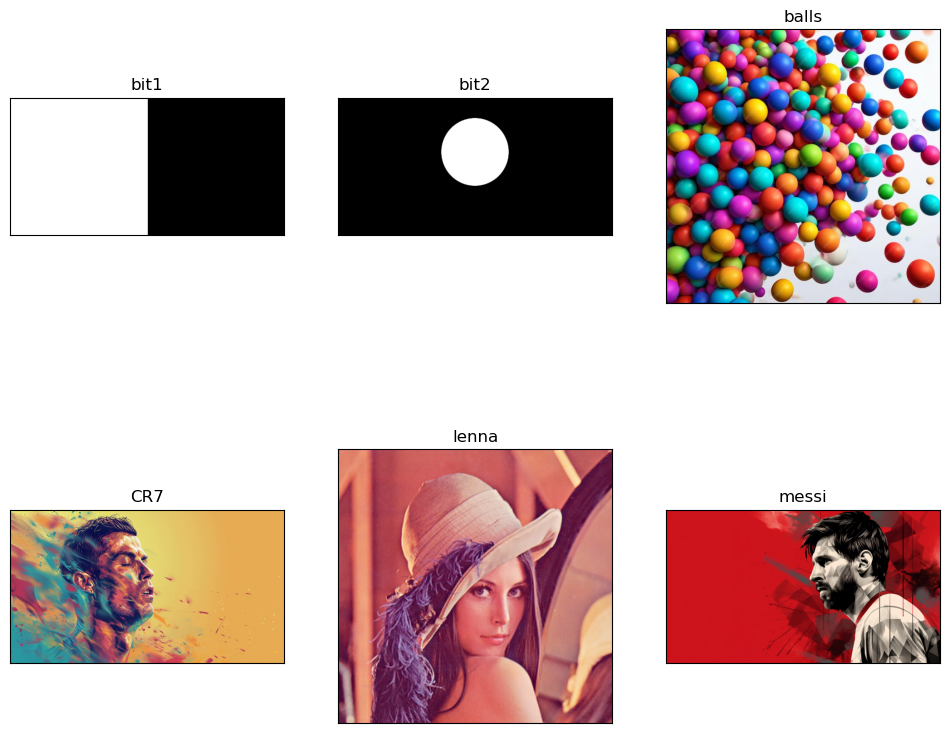

In [30]:
imgs_paths = [r"assets\1bit1.png",r"assets\2bit2.png",r"assets\balls.png",r"assets\CR7.png",r"assets\Lenna.png",r"assets\Messi.png"]
titles = ["bit1","bit2","balls","CR7","lenna","messi"]
imgs= []
plt.figure(figsize=(12,10))
for path in imgs_paths:
    img =cv2.imread(path)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    imgs.append(img)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

